In [6]:
import pickle as pkl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl

mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['font.size']=45
mpl.rcParams['figure.figsize']=(16,16)
#mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['axes.linewidth']= 3.
mpl.rcParams['axes.titlepad'] = 20
#plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
mpl.rcParams['axes.titlepad'] = 20

In [7]:

def get_data(path):
    out_ = {}
    with open(path, "rb") as f:
        dic = pkl.load(f)
    L = len(dic['out'])            
    out_['retrain_losses'] = [dic['out'][i]['retrain_losses']for i in range(L)] # L models
    out_['retrain_val_losses'] = [dic['out'][i]['retrain_val_losses'] for i in range(len(dic['out']))]
    out_['post_test_loss'] = [dic['out'][i]['post_test_loss'] for i in range(len(dic['out']))]

    out_['class_train_acc'] = [dic['out'][i]['class_train_acc'] for i in range(len(dic['out']))]
    out_['class_val_acc'] = [dic['out'][i]['class_val_acc'] for i in range(len(dic['out']))]
    return out_        
                    

In [8]:
def get_losses(dic):
    train_losses = []
    if len(np.shape(dic['retrain_losses'])) == 3:
        dic['retrain_losses'] = np.squeeze(dic['retrain_losses'])
    if len(np.shape(dic['retrain_val_losses'])) == 3:
        dic['retrain_val_losses'] = np.squeeze(dic['retrain_val_losses'])     
    if len(np.shape(dic['post_test_loss'])) == 3:
        dic['post_test_loss'] = np.squeeze(dic['post_test_loss'])     
    for o in dic['retrain_losses']:
        L = 0
        outs = []
        for oo  in o:
            outs.extend(oo)
            
        train_losses.append(np.append(np.array(outs),np.zeros(2000-len(outs))+np.nan))

    val_losses = []
    for o in dic['retrain_val_losses']:
        L = 0
        outs = []
        for oo  in o:
            outs.extend(oo)
        
        val_losses.append(np.append(np.array(outs),np.zeros(2000-len(outs))+np.nan))

    test_losses =[]
    for o in dic['post_test_loss']:
        print(o)
        test_losses.append(np.append(np.array(o),np.zeros(2000-len(o))+np.nan))
    train_mean = np.nanmean(np.array(train_losses), axis=0)
    train_std = np.nanstd(np.array(train_losses),axis=0)
    val_mean =  np.nanmean(np.array(val_losses), axis=0)
    val_std = np.nanstd(np.array(val_losses),axis=0) 
    test_mean =  np.nanmean(np.array(test_losses), axis=0)
    test_std = np.nanstd(np.array(test_losses),axis=0) 
    return train_mean ,train_std, val_mean, val_std, test_mean  , test_std  #
#

[0.14745463 0.10159925]
[0.18967858 0.09187673]
[0.16376556 0.11738545]
[0.1413806  0.09339665]
[0.13932939 0.09890347]
[0.23329234 0.12202872]
[0.18044953 0.09456872]
[0.15131219 0.09339769]
[0.20388689 0.10730089]
[0.14560854 0.09785736]
[0.16961583 0.10183149        nan ...        nan        nan        nan]
[0.14745463 0.10159925]
[0.18967858 0.09187673]
[0.16376556 0.11738545]
[0.1413806  0.09339665]
[0.13932939 0.09890347]
[0.23329234 0.12202872]
[0.18044953 0.09456872]
[0.15131219 0.09339769]
[0.20388689 0.10730089]
[0.14560854 0.09785736]
[0.16961583 0.10183149        nan ...        nan        nan        nan]


/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_3818034/2509007461.py:30: RuntimeWarning: Mean of empty slice
  train_mean = np.nanmean(np.array(train_losses), axis=0)
/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3818034/2509007461.py:32: RuntimeWarning: Mean of empty slice
  val_mean =  np.nanmean(np.array(val_losses), axis=0)
/tmp/ipykernel_3818034/2509007461.py:34: RuntimeWarning: Mean of empty slice
  test_mean =  np.nanmean(np.array(

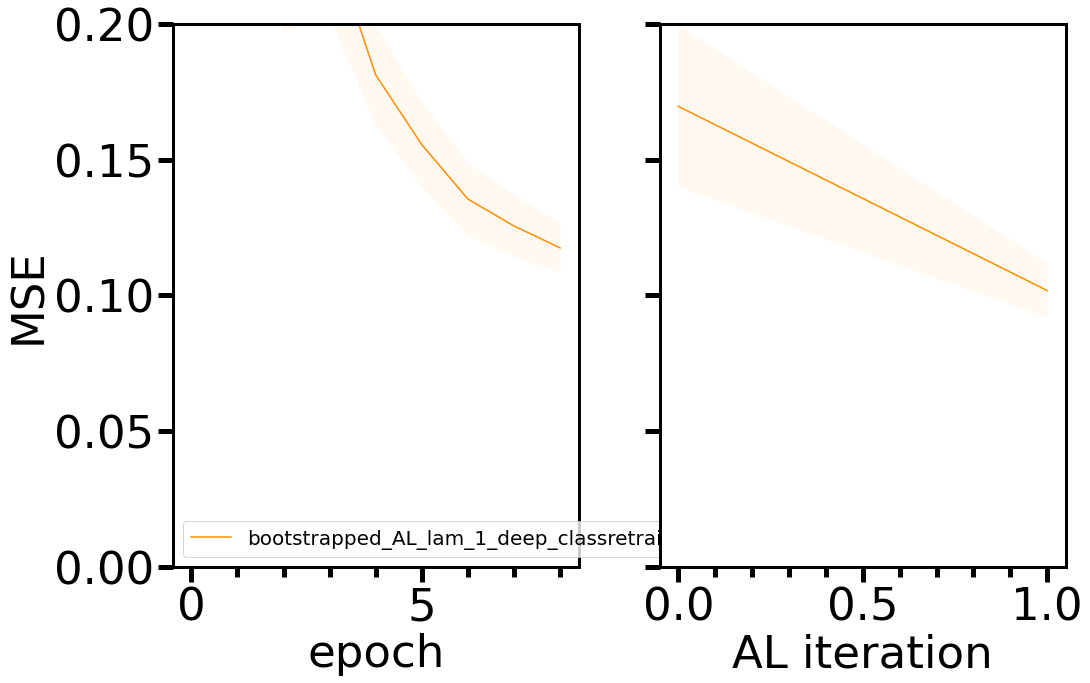

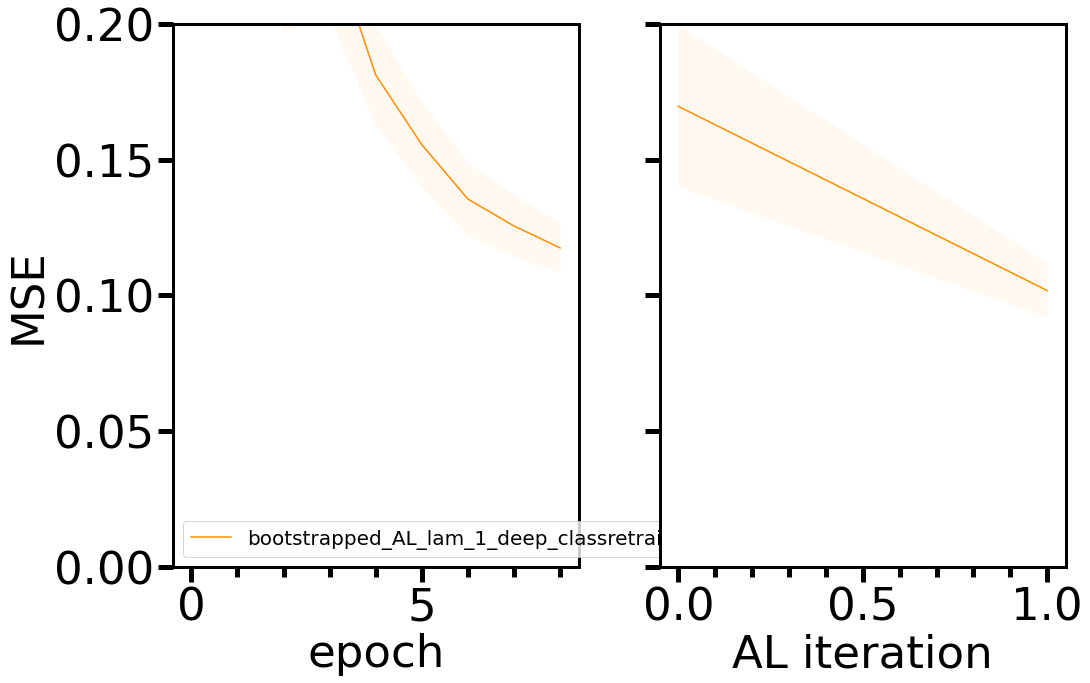

In [11]:
path1 = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/3000_2000/'
#path2 = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/30000/'

names = ['bootstrapped_AL_lam_1_shallow_wide_classretrain_True',
'bootstrapped_AL_lam_1_shallow_wide_classretrain_False',
'bootstrapped_AL_lam_1_deep_classretrain_True',]
names=['bootstrapped_AL_lam_1_deep_classretrain_False_norescale']

colors = ['darkorange','magenta','cyan','firebrick']


fig1, ax1 = plt.subplots(1,2, figsize=(16,10), sharey=True)
fig2, ax2 = plt.subplots(1,2, figsize=(16,10), sharey=True)

for path,ax in zip([path1,path1],[ax1,ax2]):

    for n,c in zip(names,colors):
        first = get_data(path+n+'.pkl')
        #second = get_data(path2+n+'.pkl')
        train_mean ,train_std, val_mean, val_std, test_mean, test_std = get_losses(first)
        print(test_mean)
        ax[0].fill_between(range(len(train_mean)),train_mean-train_std,train_mean+train_std,alpha=0.05, facecolor=c)
        ax[0].plot(range(len(train_mean)),train_mean, label=n,color=c)

        #ax[0].fill_between(range(len(val_mean)),val_mean-val_std,val_mean+val_std,alpha=0.05, facecolor=c,hatch='/')
        #ax[0].plot(range(len(val_mean)),val_mean,color=c, ls='--')
        ax[1].fill_between(range(len(test_mean)),test_mean-test_std,test_mean+test_std,alpha=0.05, facecolor=c)
        ax[1].plot(range(len(test_mean)),test_mean,color=c)            
    ax[0].set_ylabel('MSE')
    ax[0].set_xlabel('epoch')
    ax[1].set_xlabel('AL iteration')
    ax[0].legend(fontsize=20)
    ax[0].set_ylim(0,0.2)


In [18]:
first.keys()

dict_keys(['retrain_losses', 'retrain_test_losses', 'class_train_acc', 'class_val_acc'])

(13, 500)
(13, 500)


/tmp/ipykernel_761035/3725912427.py:16: RuntimeWarning: Mean of empty slice
  train_mean = np.nanmean(np.array(train_losses), axis=0)
/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_761035/3725912427.py:18: RuntimeWarning: Mean of empty slice
  test_mean =  np.nanmean(np.array(test_losses), axis=0)#


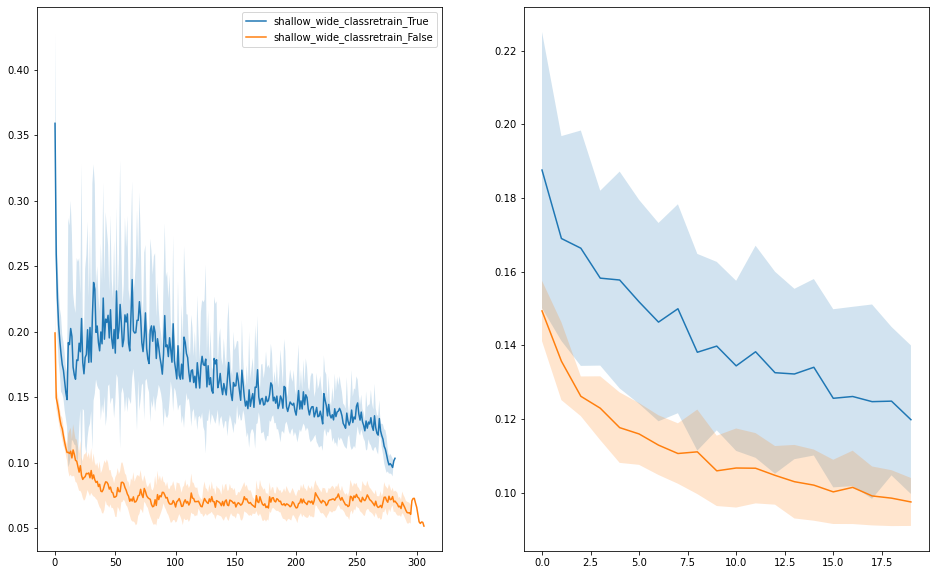

In [126]:
train_mean_first ,train_std_first, test_mean_first, test_std_first = get_losses(first)
train_mean_second ,train_std_second, test_mean_second, test_std_second = get_losses(second)

fig, ax = plt.subplots(1,2,figsize=(16,10))

List = [[train_mean_first ,train_std_first, test_mean_first, test_std_first], [train_mean_second ,train_std_second, test_mean_second, test_std_second]]
labels = ['shallow_wide_classretrain_True','shallow_wide_classretrain_False']#,'deep_classretrain_True','deep_classretrain_False']
for item,lab in zip(List,labels):
    train_mean ,train_std, test_mean , test_std = item
    ax[0].fill_between(range(len(train_mean)),train_mean-train_std,train_mean+train_std,alpha=0.2)
    ax[0].plot(range(len(train_mean)),train_mean, label=lab)
    ax[1].fill_between(range(len(test_mean)),test_mean-test_std,test_mean+test_std,alpha=0.2)
    ax[1].plot(range(len(test_mean)),test_mean)


ax[0].legend()



In [14]:
path = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/'

out = {'retrain_losses':[],'retrain_test_losses':[],'post_test_loss':[]}
for i in range(2,14):
    try:
        name = path+f'bootstrapped_{i}_AL_lam_1_shallow_wide.pkl'
        with open(name,'rb') as f:
            d = pkl.load(f)
        out['retrain_losses'].append(d['out']['retrain_losses'])
        out['retrain_test_losses'].append(d['out']['retrain_test_losses'])
        out['post_test_loss'].append(d['out']['post_test_loss'])
    except:
        pass

out['retrain_losses'] = np.asarray(out['retrain_losses'])
out['post_test_loss'] = np.asarray(out['post_test_loss'])
out['retrain_test_losses'] = np.asarray(out['retrain_test_losses'])


In [7]:
path = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/baselines/'

base = {'train_loss':[],'val_loss':[],'test_loss':[]}
for i in range(2,13):
    try:
        name = path+f'random_e_regressor_losses_30_{i}.pkl'
        with open(name,'rb') as f:
            d = pkl.load(f)
        base['train_loss'].append(d['metrics'][0])
        base['val_loss'].append(d['metrics'][1])
        base['test_loss'].append(d['test_losses'])
    except:
        pass


base['train_loss'] = np.asarray(base['train_loss'])
base['val_loss'] = np.asarray(base['val_loss'])
base['test_loss'] = np.asarray(base['test_loss'])


/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
base_mean = np.mean(base['test_loss'])
base_std = np.std(base['test_loss'])

#base_val_mean = np.mean(base['val_loss'])
#base_val_std = np.std(base['val_loss'])

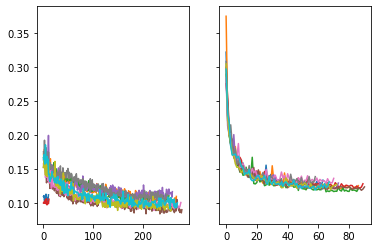

In [48]:
fig, ax = plt.subplots(1,2,sharey=True)
val_losses = []
base_val_losses = []
for o in out['retrain_test_losses']:
    L = 0
    outs = []
    for oo  in o:
        outs.extend(oo)
        L+=len(oo)
        
    if L>30:
        val_losses.append(np.array(outs)[:200])
    ax[0].plot(np.arange(L),outs)       

for o in base['val_loss']:
    L = len(o)      
    if L>30:
        base_val_losses.append(np.array(o)[:55])
    ax[1].plot(np.arange(len(o)),o)       
 

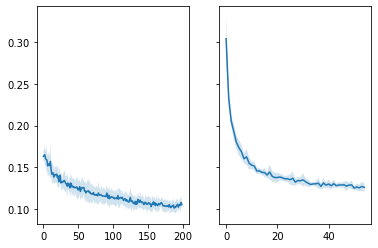

In [50]:
fig, ax = plt.subplots(1,2,sharey=True)

val_losses = np.array(val_losses)
mean = np.mean(val_losses, axis=0)
std = np.std(val_losses,axis=0)

base_val_losses = np.array(base_val_losses)
base_val_mean = np.mean(base_val_losses, axis=0)
base_val_std = np.std(base_val_losses,axis=0)

ax[0].fill_between(range(len(mean)), mean-std,mean+std, alpha=0.2)
ax[0].plot(range(len(mean)), mean)

ax[1].fill_between(range(len(base_val_mean)), base_val_mean-base_val_std,base_val_mean+base_val_std, alpha=0.2)
ax[1].plot(range(len(base_val_mean)), base_val_mean)

array([], dtype=float64)

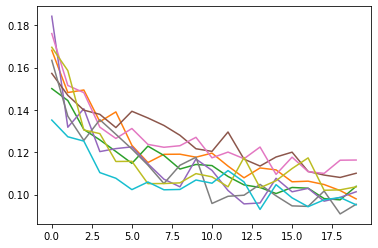

In [16]:
test_losses = []
for o in out['post_test_loss']:
    test_losses.append(np.array(o))
    plt.plot(np.arange(len(o)),o)        

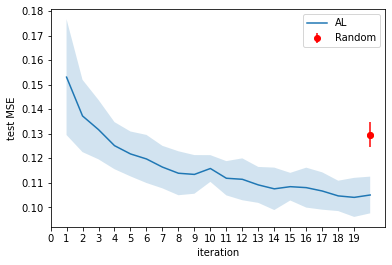

In [52]:
test_losses = np.array(test_losses)
mean = np.mean(test_losses, axis=0)
std = np.std(test_losses,axis=0)

plt.fill_between(np.arange(len(mean))+1, mean-std,mean+std, alpha=0.2)
plt.plot(np.arange(len(mean))+1, mean, label='AL')

plt.errorbar(len(mean), base_mean, yerr=base_std, fmt='o',color='red', label='Random')
plt.scatter(len(mean), base_mean)
plt.xticks(np.arange(20));

plt.ylabel('test MSE')
plt.xlabel('iteration')
plt.legend()


In [23]:
plt.errorbar??

Signature:
plt.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : float or array-like
    The data positions.

xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2, N): Separate - and + values for each bar. First row
      contains the lower errors, the second row contains the

In [2]:
name = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/bootstrapped_AL_lam_1_shallow_wide.pkl'
with open(name,'rb') as f:
    shallow_dic = pkl.load(f)

name = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/bootstrapped_AL_lam_1_deep.pkl'
with open(name,'rb') as f:
    deep_dic = pkl.load(f)    

In [7]:
shallow_dic['out'][0].keys()


dict_keys(['train_loss_init', 'test_loss_init', 'class_train_loss_init', 'class_test_loss_init', 'class_train_acc_init', 'class_test_acc_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc', 'holdout_class_acc', 'holdout_class_loss'])

In [10]:
def plot(dic, key):
    out = []
    for d in dic['out']:
        out.append(d[key][0])

    print(out)        

In [14]:
plot(deep_dic, 'retrain_test_losses')

[[0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588

In [36]:
with open('/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/baselines/random_efiitg_gb_regressor_losses_30000K.pkl','rb') as f:
    baseline = pkl.load(f)

In [22]:
baseline.keys()

dict_keys(['metrics', 'test_losses'])

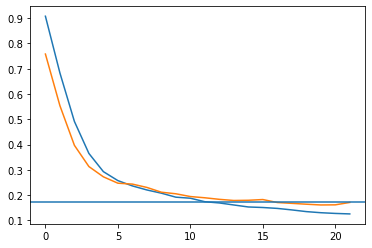

In [37]:
test_baseline = baseline['test_losses']
train_baseline = baseline['metrics']
plt.plot(range(len(train_baseline[0])), train_baseline[0])
plt.plot(range(len(train_baseline[0])), train_baseline[1])
plt.axhline(test_baseline)
#plt.plot(range(len(train)), train)

20000
20560
21107
21655
22202
22763
23329
23905
24471
25036
25585
26160
26742
27333
27887
28467
29028
29613
30208
30785


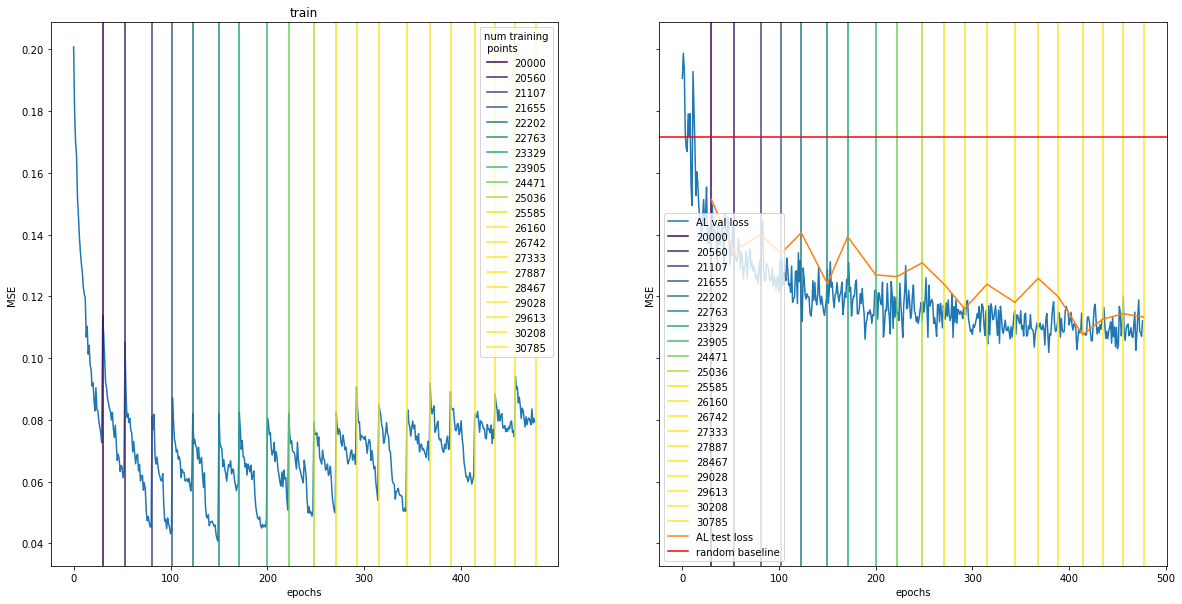

In [41]:
g, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
train = []
test = []
breaks = []
for i,(d1,d2) in enumerate(zip(dic['retrain_losses'],dic['retrain_test_losses'])):
    train.extend(d1)
    test.extend(d2)
    breaks.extend([len(d1)])
breaks = np.cumsum(breaks)
colors = [ plt.get_cmap('viridis')(i*25) for i in range(len(breaks))]
ax[0].plot(range(len(train)), train,)
ax[1].plot(range(len(test)), test, label='AL val loss')
for c, (label, b) in zip(colors,zip(dic['n_train_points'],breaks)):
    print(label)
    ax[0].axvline(b, label=label, color=c)
    ax[1].axvline(b, label=label,color=c)
ax[1].plot(breaks, dic['post_test_loss'], label='AL test loss')

ax[0].set_title('train')

ax[0].legend(title="num training\n points")
ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('MSE')
ax[1].axhline(test_baseline, color='red',label='random baseline')
ax[1].legend()

In [34]:
np.sqrt(dic['post_test_loss_unscaled'])

array([3.09760339, 2.92092733, 2.97840458, 2.91310977, 2.98457587,
       2.80444465, 2.97112366, 2.83646321, 2.82971355, 2.87968795,
       2.80122647, 2.71064171, 2.80244793, 2.73494549, 2.82376713,
       2.75539938, 2.61051956, 2.67157609, 2.69182811, 2.67955001])

In [4]:
plt.plot(range(len(dic['holdout_pred_before'])), dic['holdout_pred_before'], label='before')
plt.plot(range(len(dic['holdout_pred_after'])), dic['holdout_pred_after'], label='after')
plt.legend()

/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 362x300022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [6]:
np.asarray(dic['holdout_pred_before']).shape

(10, 10000)

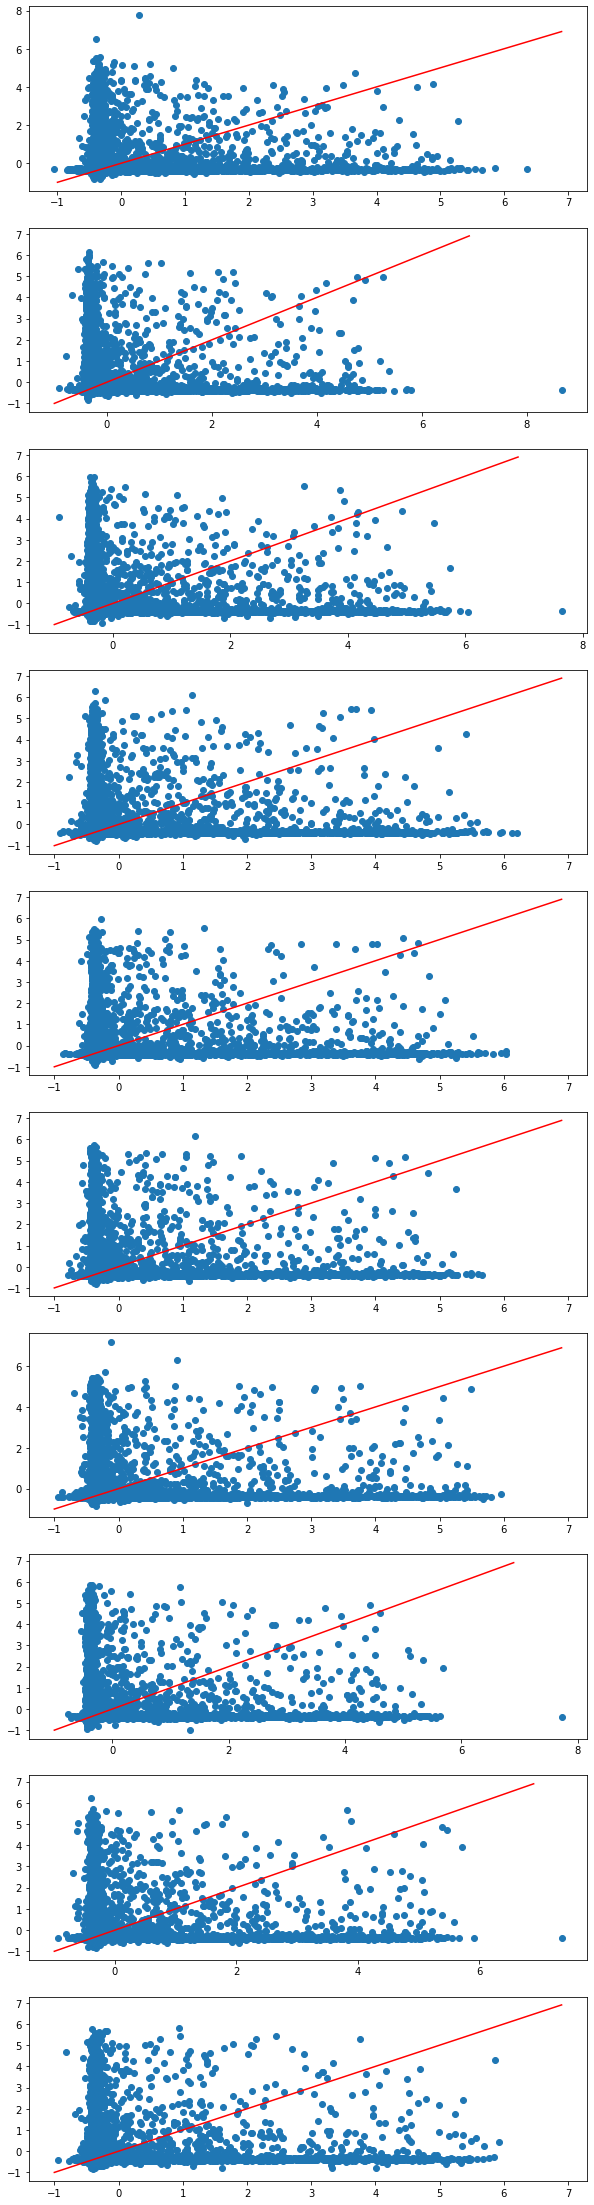

In [7]:
dim1 = len(dic['holdout_pred_before'])
fig, ax = plt.subplots(dim1, 1, figsize=(10,40))
for a, (d1,d2) in zip(ax.ravel(),  zip(dic['holdout_pred_before'], dic['holdout_pred_after'])):
    a.scatter(d1,d2)
    xx = np.arange(-1,7,0.1)
    a.plot(xx,xx, color='red')


In [ ]:
# To Do: add comparison with big model trained on 10^4 data points
# To Do: convert training size to percentage
# To Do:  explore candidate_batch hyperparam
# To Do: save scaler! Or descale all losses

20000
20591
21158
21735
22321
22897
23492
24081
24679
25258


Text(0, 0.5, 'MSE')

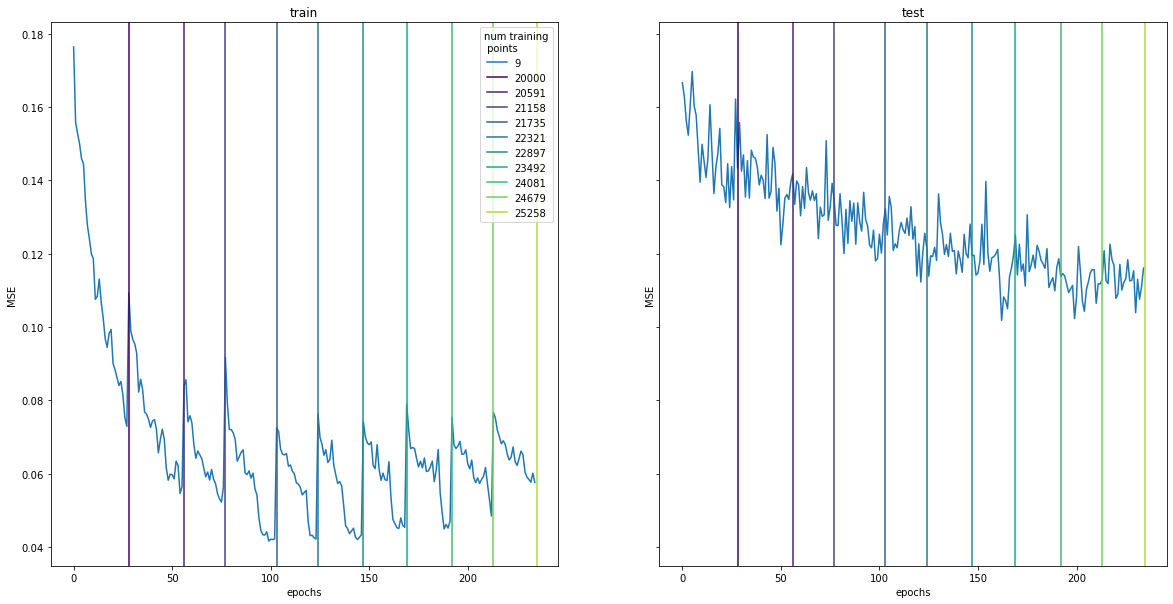

In [24]:
dic['n_train_points']

[20000, 20591, 21158, 21735, 22321, 22897, 23492, 24081, 24679, 25258]